In [1]:
import numpy as np
from sklearn.preprocessing import quantile_transform
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os 


In [2]:
#Data reading compacted dataset
data_dir ='/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_DATA/ponderful_DATA_updated'
Phy_Che_file = os.path.join(data_dir,'PhyChe_XY(oct).csv')
Phy_Che= pd.read_csv(Phy_Che_file,sep=',',index_col=0)
display(Phy_Che)

,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,pH,O2_con,...,bio6.t,bio7.t,bio12.t,bio15.t,bio17.t,Area.t,Depth.t,Animals_cont.t,Hydeoperiod_length.t,ECELS.t
1,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,5.9075,8.837500,...,0.067940,-0.162600,0.318639,-0.894913,0.494670,0.021361,-0.667948,0.506436,0.45197,-0.142841
2,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,6.1425,0.420000,...,0.057475,-0.205092,0.318639,-0.819502,0.494670,-0.513872,-0.542462,0.506436,0.45197,1.481949
3,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,5.6500,3.517500,...,-0.015667,-0.173193,0.318639,-0.849086,0.494670,0.186817,-0.864160,0.506436,0.45197,0.711737
4,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,6.5775,5.560000,...,-0.036563,-0.237202,0.362917,-0.879433,0.494670,-0.968627,-1.082193,0.506436,0.45197,0.509180
5,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,5.7225,6.840000,...,0.015667,-0.183805,0.318639,-0.834203,0.494670,1.322131,-1.140287,0.506436,0.45197,2.474381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,-54.749753,-34.383481,Valle del Cordillera,Uruguay,1,1,7.0140,8.496667,...,1.170831,-0.340695,0.841621,0.560703,0.887147,-0.571930,0.390951,1.046689,0.45197,NaN
237,URG027,VCL3,-54.747753,-34.384983,Valle del Cordillera,Uruguay,1,1,7.2460,6.255000,...,1.170831,-0.340695,0.841621,0.560703,0.887147,-1.518420,0.109886,1.046689,0.45197,NaN
238,URG028,VCH1,-54.759703,-34.383453,Valle del Cordillera,Uruguay,1,1,8.4100,8.731667,...,1.170831,-0.340695,0.841621,0.560703,0.887147,0.965948,0.291285,1.480373,0.45197,NaN
239,URG029,VCH2,-54.767964,-34.379486,Valle del Cordillera,Uruguay,1,1,7.9860,4.233333,...,1.170831,-0.340695,0.841621,0.560703,0.887147,-0.457836,-0.335166,1.480373,0.45197,NaN


In [3]:
print(Phy_Che.columns[50:102])

Index(['bio15', 'bio17', 'Nat_res', 'Area', 'Depth', 'Pond_dries',
       'Rel_waterlev', 'PVI', 'Fish', 'Animals_cont', 'lifestockQ',
       'Natural_5', 'Arable_100', 'Imp_grassland_100',
       'Pasture_Open_nature_100', 'Forest_100', 'Other_100', 'urban_3000',
       'crop_3000', 'pasture_3000', 'forestry_3000', 'undefined_3000',
       'natural_3000', 'Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500', 'Urban_500', 'Aquatic_1000',
       'Cropland_1000', 'Forest_1000', 'Pastures.and.open.nature_1000',
       'Urban_1000', 'Aquatic_5000', 'Cropland_5000', 'Forest_5000',
       'Pastures.and.open.nature_5000', 'Urban_5000', 'ECELS', 'bio1.t',
       'bio4.t', 'bio5.t', 'bio6.t', 'bio7.t', 'bio12.t', 'bio15.t', 'bio17.t',
       'Area.t', 'Depth.t', 'Animals_cont.t', 'Hydeoperiod_length.t',
       'ECELS.t'],
      dtype='object')


In [4]:
Phy_Che[['PondCode', 'Arable_100', 'Imp_grassland_100',
       'Pasture_Open_nature_100', 'Forest_100', 'Other_100']]

,PondCode,Arable_100,Imp_grassland_100,Pasture_Open_nature_100,Forest_100,Other_100
1,AW1_NA1,0.0,0.0,99.0,1.0,0.0
2,AW1_IN2,0.0,0.0,55.0,35.0,10.0
3,AW1_EX1,10.0,0.0,45.0,5.0,40.0
4,AW1_NA2,15.0,10.0,55.0,12.0,8.0
5,AW1_IN1,32.0,0.0,15.0,2.0,51.0
...,...,...,...,...,...,...
236,VCL2,0.0,0.0,95.0,5.0,0.0
237,VCL3,0.0,0.0,95.0,5.0,0.0
238,VCH1,0.0,100.0,0.0,0.0,0.0
239,VCH2,0.0,100.0,0.0,0.0,0.0


### Histogram before transformation

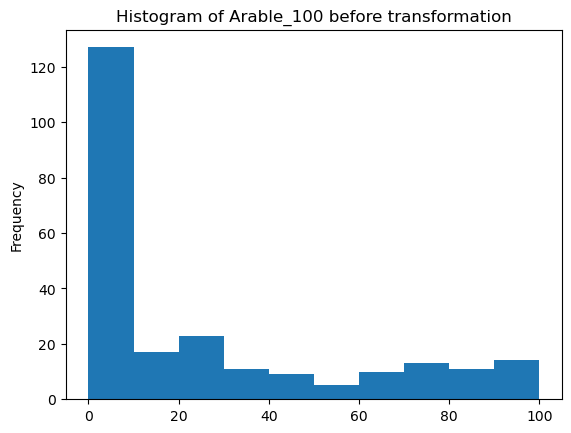

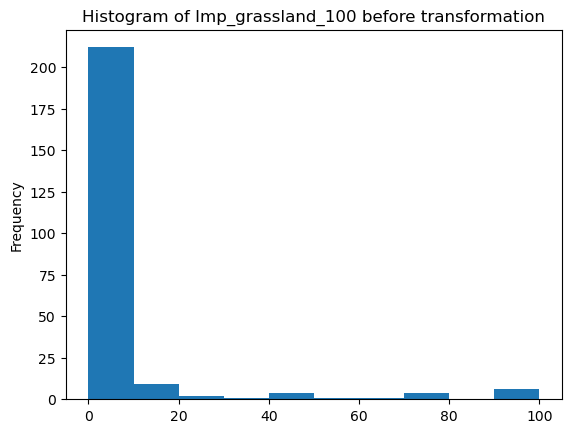

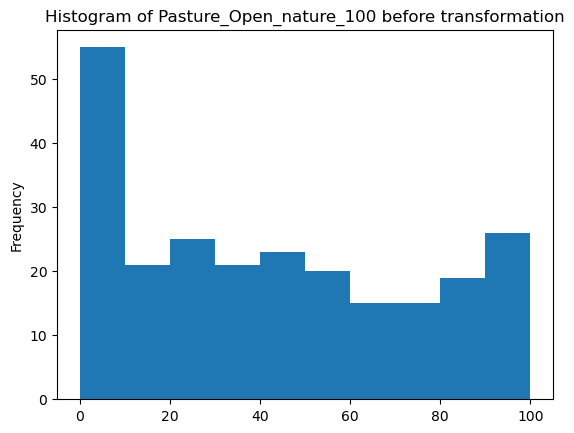

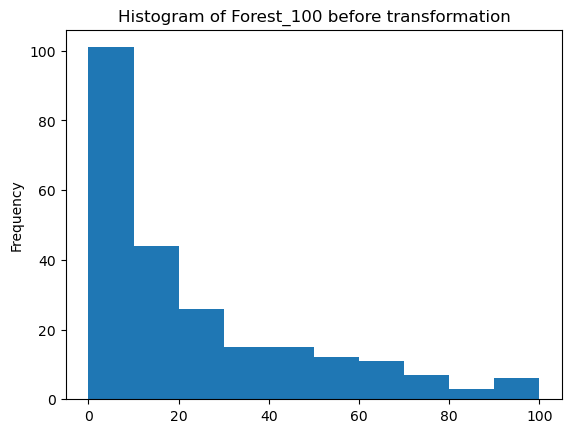

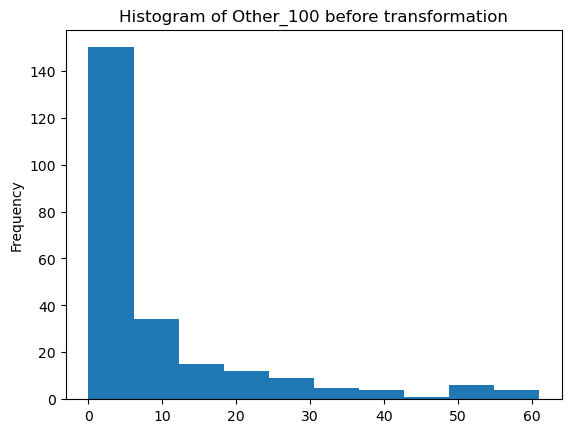

In [5]:
for i in Phy_Che[['Arable_100', 'Imp_grassland_100',
       'Pasture_Open_nature_100', 'Forest_100', 'Other_100']]:
    fig = plt.figure()
    Phy_Che[i].plot.hist()
    plt.title(f'Histogram of {i} before transformation')

### Normal quantile normalization

In [6]:
def normal_quantile_normalization(col):
    non_zero_col = col[col > 0]  # Exclude zeros
    ranks = stats.rankdata(non_zero_col)
    normalized_data = stats.norm.ppf((ranks - 0.5) / len(non_zero_col))
    full_normalized_col = pd.Series(data=col, index=col.index)  # Reconstruct with original zeros
    full_normalized_col[col > 0] = normalized_data
    return full_normalized_col

# Apply normalization to each column
phy_che_qt_final = Phy_Che[['Arable_100', 'Imp_grassland_100',
       'Pasture_Open_nature_100', 'Forest_100', 'Other_100']].apply(normal_quantile_normalization)
    

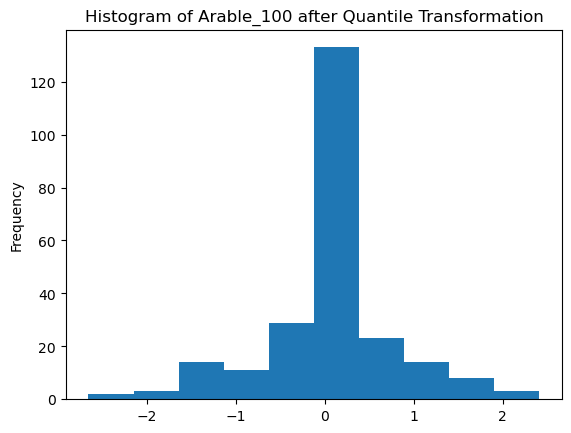

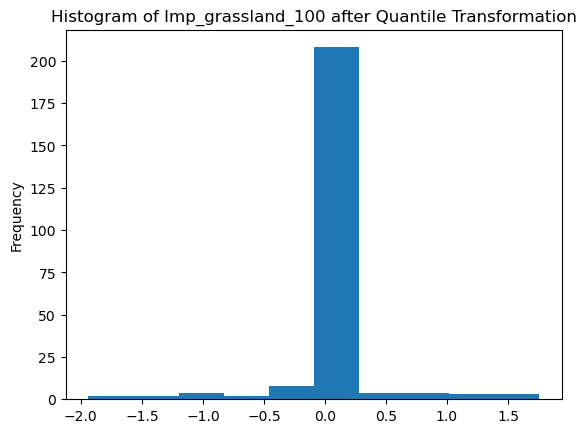

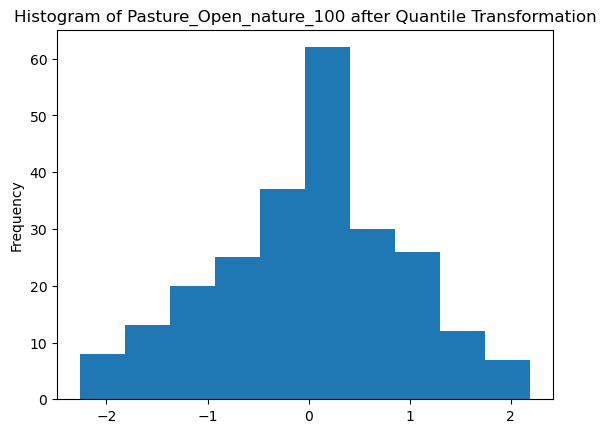

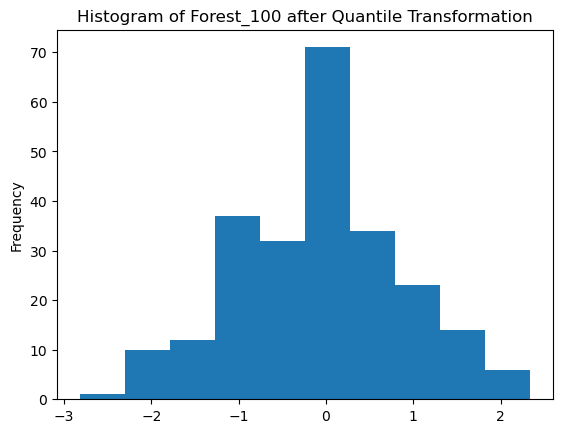

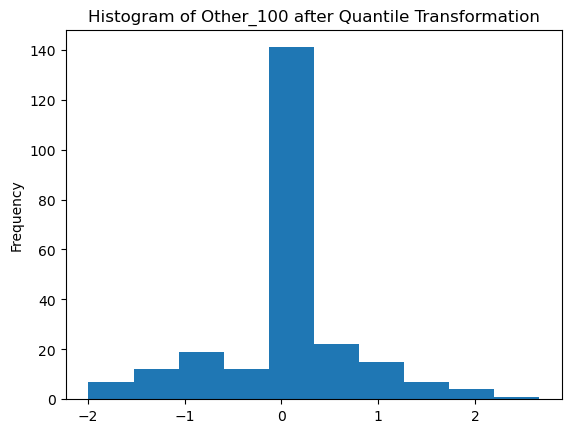

In [7]:
for i in phy_che_qt_final.columns:
    fig = plt.figure()
    phy_che_qt_final[i].plot.hist()
    plt.title(f'Histogram of {i} after Quantile Transformation')

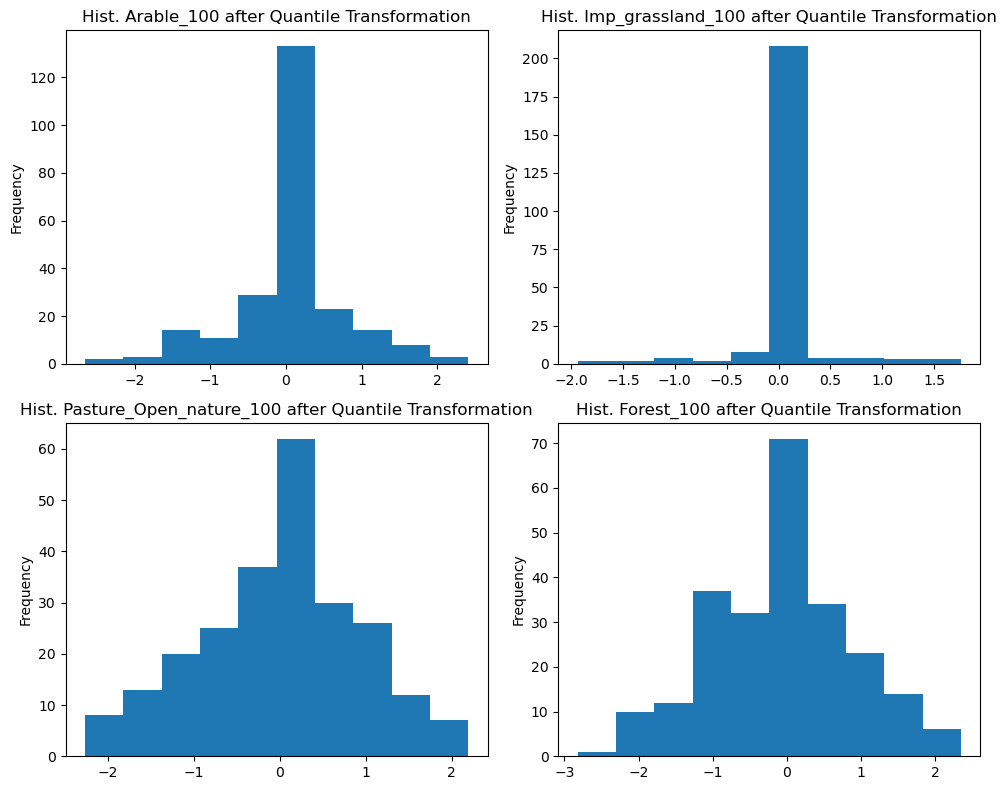

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes = axes.flatten()

for idx, col in enumerate(phy_che_qt_final.columns[:4]):
    phy_che_qt_final[col].plot.hist(ax=axes[idx])
    axes[idx].set_title(f'Hist. {col} after Quantile Transformation')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
Phy_Che[['Arable_100_qt','Imp_grassland_100_qt', 'Pastures.and.open.nature_100_qt', 'Forest_100_qt','Other_100_qt']]= phy_che_qt_final[['Arable_100', 'Imp_grassland_100',
       'Pasture_Open_nature_100', 'Forest_100', 'Other_100']]

### Updating output df

In [9]:
# Update full df(buffer 500m and 100m) transformed var dataset
Phy_Che_qt= pd.read_csv('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_qt.csv',sep=',',index_col=0)
display(Phy_Che_qt)

,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Cropland_500.t,Forest_500.t,Pastures.and.open.nature_500.t,Urban_500.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt,Natural_5_qt
1,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,Spring,6.355,...,-0.402250,0.910612,-0.067940,-0.654950,0.000000,-0.570731,0.899016,-0.067940,-2.393980,-2.361894
2,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,Spring,6.305,...,-0.459558,1.063622,-0.346234,0.579132,0.210428,-0.639147,1.052930,-0.346234,0.318639,-0.276950
3,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,Spring,6.005,...,0.357345,0.357345,-0.036563,-0.183805,0.000000,0.271036,0.341070,-0.036563,-0.718868,-0.045591
4,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,Spring,7.195,...,-0.152026,0.413601,0.459558,0.078412,0.593821,-0.282875,0.397935,0.459558,-0.318639,0.000000
5,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,Spring,5.900,...,-0.026114,0.269558,0.591528,-0.554602,0.000000,-0.142907,0.252250,0.591528,-1.618497,-0.453762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,-54.749753,-34.383481,Valle del Cordillera,Uruguay,1,1,Spring,7.880,...,-1.731664,-0.776422,1.665398,-1.150349,0.000000,0.000000,-0.822105,1.665398,0.000000,0.000000
237,URG027,VCL3,-54.747753,-34.384983,Valle del Cordillera,Uruguay,1,1,Spring,7.800,...,-1.731664,-0.194437,1.343325,-1.150349,0.000000,0.000000,-0.219486,1.343325,0.000000,-2.361894
238,URG028,VCH1,-54.759703,-34.383453,Valle del Cordillera,Uruguay,1,1,Spring,9.610,...,-0.335166,-1.181259,1.369531,-0.390951,0.000000,-0.491989,-1.260117,1.369531,-1.123769,0.000000
239,URG029,VCH2,-54.767964,-34.379486,Valle del Cordillera,Uruguay,1,1,Spring,8.470,...,-0.324138,-0.604016,1.140287,-1.150349,0.000000,-0.479169,-0.641518,1.140287,0.000000,0.000000


In [10]:
merged_df= Phy_Che_qt.merge(Phy_Che[['PondCode','Arable_100', 'Imp_grassland_100',
       'Pasture_Open_nature_100', 'Forest_100', 'Other_100','Arable_100_qt','Imp_grassland_100_qt', 'Pastures.and.open.nature_100_qt', 'Forest_100_qt','Other_100_qt']],on='PondCode',how='left')

In [11]:
merged_df

,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Arable_100,Imp_grassland_100,Pasture_Open_nature_100,Forest_100,Other_100,Arable_100_qt,Imp_grassland_100_qt,Pastures.and.open.nature_100_qt,Forest_100_qt,Other_100_qt
0,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,Spring,6.355,...,0.0,0.0,99.0,1.0,0.0,0.000000,0.000000,1.873257,-1.900128,0.000000
1,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,Spring,6.305,...,0.0,0.0,55.0,35.0,10.0,0.000000,0.000000,0.255778,0.590249,-0.115950
2,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,Spring,6.005,...,10.0,0.0,45.0,5.0,40.0,-1.140764,0.000000,0.047090,-0.821286,1.259936
3,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,Spring,7.195,...,15.0,10.0,55.0,12.0,8.0,-0.876143,-0.442822,0.255778,-0.144422,-0.374957
4,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,Spring,5.900,...,32.0,0.0,15.0,2.0,51.0,-0.049755,0.000000,-0.793941,-1.480440,1.724512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,URG026,VCL2,-54.749753,-34.383481,Valle del Cordillera,Uruguay,1,1,Spring,7.880,...,0.0,0.0,95.0,5.0,0.0,0.000000,0.000000,1.607334,-0.821286,0.000000
236,URG027,VCL3,-54.747753,-34.384983,Valle del Cordillera,Uruguay,1,1,Spring,7.800,...,0.0,0.0,95.0,5.0,0.0,0.000000,0.000000,1.607334,-0.821286,0.000000
237,URG028,VCH1,-54.759703,-34.383453,Valle del Cordillera,Uruguay,1,1,Spring,9.610,...,0.0,100.0,0.0,0.0,0.0,0.000000,1.756827,0.000000,0.000000,0.000000
238,URG029,VCH2,-54.767964,-34.379486,Valle del Cordillera,Uruguay,1,1,Spring,8.470,...,0.0,100.0,0.0,0.0,0.0,0.000000,1.756827,0.000000,0.000000,0.000000


In [74]:
merged_df.to_csv('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_oct_qt.csv')
merged_df.to_pickle('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_oct_qt.pkl')